In [2]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#data preparation
data=pd.read_csv("dataset/cancer patient data sets.csv")
data= data.drop("Patient Id", axis=1)
data= data.drop("index", axis=1)

target= data.pop("Level")
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.25, random_state=1)


<AxesSubplot: >

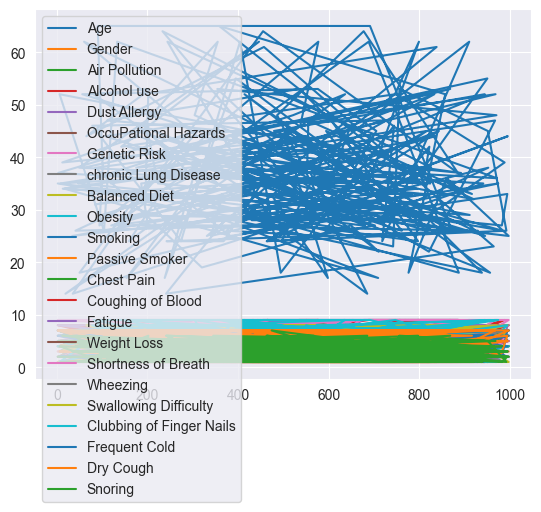

In [4]:

x_test.plot()

In [5]:
model= LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Samo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
predictions= model.predict(x_test)
score = model.score(x_test, y_test)
test_case= x_test.to_numpy()[0]
test_case= test_case.reshape(1,-1)
a= model.predict(test_case)
print(test_case)

[[45  2  1  2  3  4  2  4  3  3  3  2  3  4  4  1  2  4  6  5  4  2  5]]


C:\Users\Samo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[94  0  0]
 [ 0 78  0]
 [ 0  4 74]]


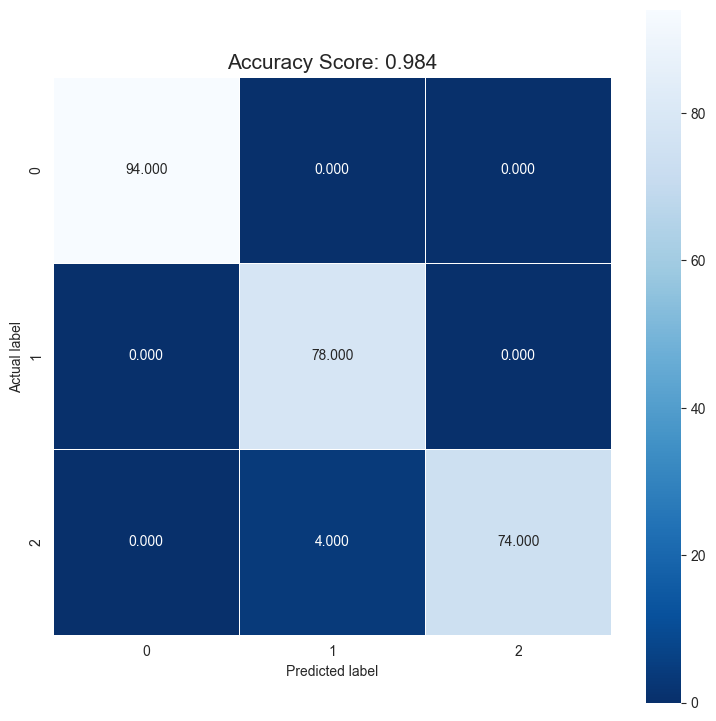

In [8]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [9]:
#save model to file
with open("predict_lung_cancer.txt", "wb") as f:
    pickle.dump(model, f)


In [12]:
#get max value for data set
a= data.min()
a=a.to_numpy().reshape(23)
print(a)

[14  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [11]:
r=data.columns.values.reshape(23)
list(data.columns)

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']